In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('data_cleaning/air_pollution_final.csv')
df

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,country_code,latitude,longitude
0,Russian Federation,Praskoveya,51,1,1,0,36,0,0,0,51,1,RF,61.524000,105.318800
1,Brazil,Presidente Dutra,41,0,1,0,5,0,1,0,41,0,BR,-14.235004,-51.925280
2,Italy,Priolo Gargallo,66,1,1,0,39,0,2,0,66,1,IT,41.871940,12.567380
3,Poland,Przasnysz,34,0,1,0,34,0,0,0,20,0,PL,51.919438,19.145136
4,France,Punaauia,22,0,0,0,22,0,0,0,6,0,FR,46.227638,2.213749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23457,India,Gursahaiganj,184,3,3,0,154,3,2,0,184,3,IN,20.593684,78.962880
23458,France,Sceaux,50,0,1,0,20,0,5,0,50,0,FR,46.227638,2.213749
23459,India,Mormugao,50,0,1,0,22,0,1,0,50,0,IN,20.593684,78.962880
23460,United States of America,Westerville,71,1,1,0,44,0,2,0,71,1,USA,37.090200,-95.712900


In [33]:
# One-hot encode the 'country_code' column
df_encoded = pd.get_dummies(df, columns=['country_code'])

# Print the encoded dataframe
df_encoded.columns


Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category',
       ...
       'country_code_VE', 'country_code_VN', 'country_code_VNM',
       'country_code_VU', 'country_code_WS', 'country_code_YE',
       'country_code_YT', 'country_code_ZA', 'country_code_ZM',
       'country_code_ZW'],
      dtype='object', length=209)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df[['AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'latitude', 'longitude']]  
y = df['PM2.5 AQI Value'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the PM2.5 AQI value for the test data
y_pred = model.predict(X_test)

# Print the predicted values
print(y_pred)


[ 21.33037091  73.37064163 168.77252137 ... 161.41328162  56.9328922
  39.30533371]


64.55639500824526


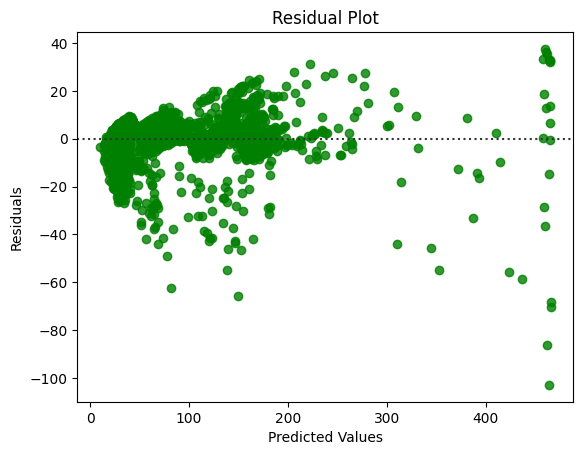

In [38]:
import seaborn as sns
from sklearn.metrics import mean_squared_error

# Calculate the residuals
residuals = y_test - y_pred
print(mean_squared_error(y_test, y_pred))

# Create the residual plot
sns.residplot(x=y_pred, y=residuals,  color='g')

# Set the plot title and labels
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Show the plot
plt.show()


In [37]:

y_mean_as_pred = [y_train.mean()] * len(y_test)

# Calculate the residuals
residuals = y_test - y_mean_as_pred


# Calculate the average squared error loss
mse = mean_squared_error(y_test, y_mean_as_pred)

# Print the result
print(mse)



3061.660161522511


31.421106407194028


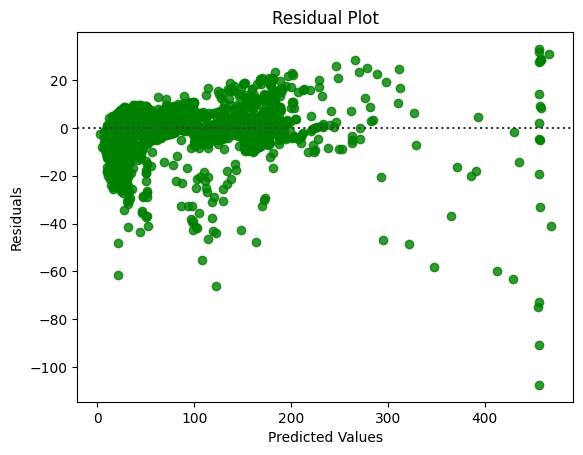

In [44]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[['AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'latitude', 'longitude']]  
y = df['PM2.5 AQI Value'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a MLP regressor model
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print(mse)

sns.residplot(x=y_pred, y=residuals,  color='g')

# Set the plot title and labels
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Show the plot
plt.show()


37.44575616165052


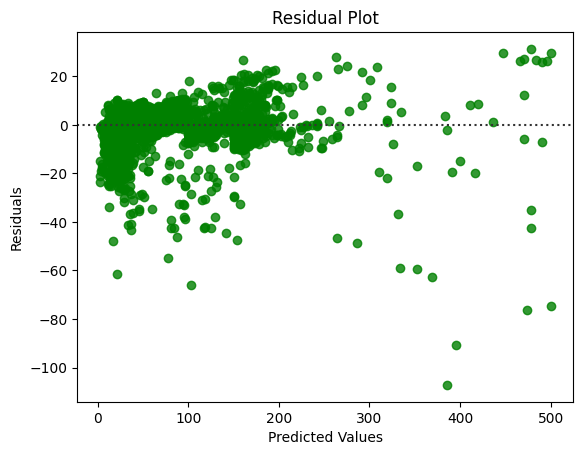

In [45]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regressor model
model = DecisionTreeRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print(mse)


sns.residplot(x=y_pred, y=residuals,  color='g')

# Set the plot title and labels
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Show the plot
plt.show()

27.31884459590052


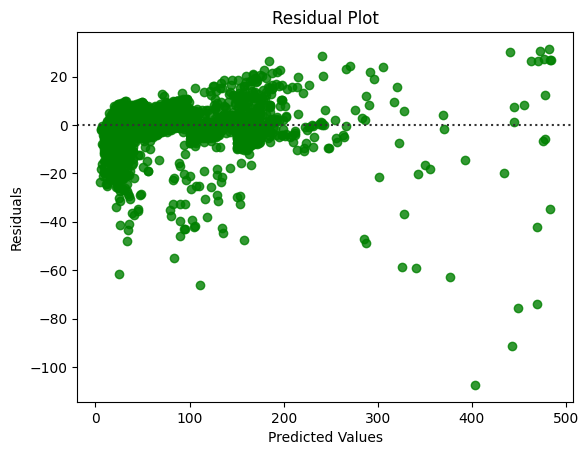

In [46]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print(mse)

sns.residplot(x=y_pred, y=residuals,  color='g')

# Set the plot title and labels
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Show the plot
plt.show()


37.488961679757345


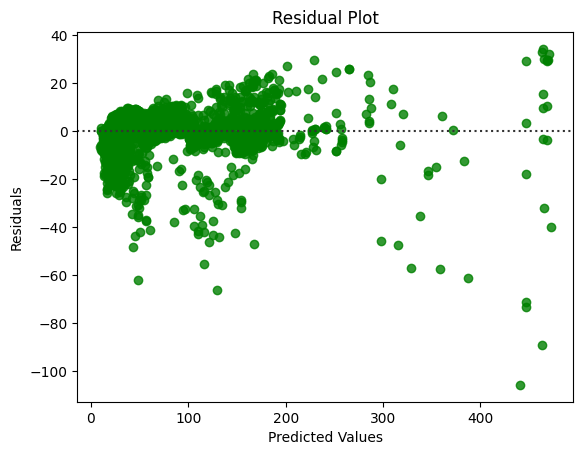

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a GradientBoostingRegressor model
model = GradientBoostingRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print(mse)

sns.residplot(x=y_pred, y=residuals,  color='g')

# Set the plot title and labels
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Show the plot
plt.show()
